# Emotional VAE Training Notebook

In [1]:
config = {
    "latent_dir": "latent_representations",
    "output_dir": "vae_model",
    "chunk_size": 10,
    "batch_size": 64,
    "epochs": 70,
    "lr": 1e-5,
    "beta": 0.5,
    "max_samples": None
}

# Required Libraries

In [2]:
import json
import os
import utils._modeltraining
from utils._modeltraining import *


%matplotlib inline
warnings.filterwarnings('ignore')

# Training Setup

## Model Configuration

In [3]:
latent_stats_path = os.path.join(config["latent_dir"], f'latent_stats_{config["chunk_size"]}s.json')
with open(latent_stats_path, 'r') as f:
    latent_stats = json.load(f)

latent_shape = latent_stats['latent_dim']
latent_dim = latent_shape[1]  # 750
print(f"Latent shape: {latent_shape}, Used latent dimension: {latent_dim}")

Latent shape: [8, 750], Used latent dimension: 750


## Create the Model

In [4]:
# Model oluşturma
model = EmotionalVAE(
    latent_dim=latent_dim,
    hidden_dims=[512, 256, 128],
    condition_dim=2,
    use_encodec_format=True  # EnCodec uyumlu çıktı için
)
model.reset_parameters()  # Parametreleri güvenli değerlerle başlat

## Device Selection

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Data Loading

## Dataset and DataLoader

In [6]:
dataset = EmotionalLatentDataset(
    latent_dir=config["latent_dir"],
    chunk_size=config["chunk_size"],
    max_samples=config["max_samples"]
)

dataloader = DataLoader(
    dataset,
    batch_size=config["batch_size"],
    shuffle=True,
    num_workers=4
)

Loaded a total of 6976 latent representations.


Loading latent representations:   0%|          | 0/6976 [00:00<?, ?it/s]

# Training Loop

## Initialize the Trainer

In [7]:
# EnCodec uyumluluğunu test etmek için LatentRepresentationGenerator hazırla
from utils import _latentspace
lat_gen = _latentspace.LatentRepresentationGenerator(
    encodec_bandwidth=6.0,
    device=device,
    chunk_sizes=[10]
)
lat_gen._load_encodec_model()


# Trainer'ı oluştur
trainer = VAETrainer(
    model,
    latent_dir=config['latent_dir'],
    output_dir=config['output_dir'],
    chunk_size=config['chunk_size'],
    batch_size=config['batch_size'],
    lr=config['lr'],
    beta=config['beta'],
    device=device
)

Using device: cpu
Loading EnCodec model...
EnCodec model loaded successfully (target bandwidth: 6.0 kbps)
Loading EnCodec model...
EnCodec model loaded successfully (target bandwidth: 6.0 kbps)
Using device: cpu


### Start Training

In [8]:
training_stats = trainer.train(
    num_epochs=config["epochs"],
    max_samples=config["max_samples"]
)

Loaded a total of 6976 latent representations.


Loading latent representations:   0%|          | 0/6976 [00:00<?, ?it/s]

Epoch 1/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 1/70, Loss: 2549.0212, Reconstruction: 2549.0105, KL: 0.0001


Epoch 2/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 2/70, Loss: 2405.9335, Reconstruction: 2405.9228, KL: 0.0004


Epoch 3/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 3/70, Loss: 2278.6944, Reconstruction: 2278.6848, KL: 0.0008


Epoch 4/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 4/70, Loss: 2168.7752, Reconstruction: 2168.7671, KL: 0.0011


Epoch 5/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 5/70, Loss: 2076.8901, Reconstruction: 2076.8836, KL: 0.0010


Epoch 6/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 6/70, Loss: 2001.7257, Reconstruction: 2001.7206, KL: 0.0008


Epoch 7/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 7/70, Loss: 1941.3614, Reconstruction: 1941.3575, KL: 0.0005


Epoch 8/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 8/70, Loss: 1893.3780, Reconstruction: 1893.3750, KL: 0.0004


Epoch 9/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 9/70, Loss: 1855.4749, Reconstruction: 1855.4727, KL: 0.0003


Epoch 10/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 10/70, Loss: 1825.6355, Reconstruction: 1825.6337, KL: 0.0002


Epoch 11/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 11/70, Loss: 1802.2099, Reconstruction: 1802.2086, KL: 0.0001


Epoch 12/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 12/70, Loss: 1783.8007, Reconstruction: 1783.7997, KL: 0.0001


Epoch 13/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 13/70, Loss: 1769.3160, Reconstruction: 1769.3152, KL: 0.0000


Epoch 14/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 14/70, Loss: 1757.9143, Reconstruction: 1757.9137, KL: 0.0000


Epoch 15/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 15/70, Loss: 1748.9312, Reconstruction: 1748.9307, KL: 0.0000


Epoch 16/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 16/70, Loss: 1741.8269, Reconstruction: 1741.8266, KL: 0.0000


Epoch 17/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 17/70, Loss: 1736.2124, Reconstruction: 1736.2121, KL: 0.0000


Epoch 18/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 18/70, Loss: 1731.7668, Reconstruction: 1731.7665, KL: 0.0000


Epoch 19/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 19/70, Loss: 1728.2428, Reconstruction: 1728.2426, KL: 0.0000


Epoch 20/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 20/70, Loss: 1725.4439, Reconstruction: 1725.4438, KL: 0.0000


Epoch 21/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 21/70, Loss: 1723.2229, Reconstruction: 1723.2228, KL: 0.0000


Epoch 22/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 22/70, Loss: 1721.4571, Reconstruction: 1721.4570, KL: 0.0000


Epoch 23/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 23/70, Loss: 1720.0531, Reconstruction: 1720.0530, KL: 0.0000


Epoch 24/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 24/70, Loss: 1718.9371, Reconstruction: 1718.9370, KL: 0.0000


Epoch 25/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 25/70, Loss: 1718.0494, Reconstruction: 1718.0494, KL: 0.0000


Epoch 26/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 26/70, Loss: 1717.3428, Reconstruction: 1717.3428, KL: 0.0000


Epoch 27/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 27/70, Loss: 1716.7818, Reconstruction: 1716.7818, KL: 0.0000


Epoch 28/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 28/70, Loss: 1716.3358, Reconstruction: 1716.3358, KL: 0.0000


Epoch 29/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 29/70, Loss: 1716.0009, Reconstruction: 1716.0009, KL: 0.0000


Epoch 30/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 30/70, Loss: 1715.7671, Reconstruction: 1715.7671, KL: 0.0000


Epoch 31/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 31/70, Loss: 1715.5960, Reconstruction: 1715.5960, KL: 0.0000


Epoch 32/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 32/70, Loss: 1715.4649, Reconstruction: 1715.4649, KL: 0.0000


Epoch 33/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 33/70, Loss: 1715.3612, Reconstruction: 1715.3612, KL: 0.0000


Epoch 34/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 34/70, Loss: 1715.2771, Reconstruction: 1715.2771, KL: 0.0000


Epoch 35/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 35/70, Loss: 1715.2076, Reconstruction: 1715.2076, KL: 0.0000


Epoch 36/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 36/70, Loss: 1715.1491, Reconstruction: 1715.1491, KL: 0.0000


Epoch 37/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 37/70, Loss: 1715.0993, Reconstruction: 1715.0993, KL: 0.0000


Epoch 38/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 38/70, Loss: 1715.0564, Reconstruction: 1715.0564, KL: 0.0000


Epoch 39/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 39/70, Loss: 1715.0191, Reconstruction: 1715.0191, KL: 0.0000


Epoch 40/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 40/70, Loss: 1714.9864, Reconstruction: 1714.9864, KL: 0.0000


Epoch 41/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 41/70, Loss: 1714.9575, Reconstruction: 1714.9575, KL: 0.0000


Epoch 42/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 42/70, Loss: 1714.9319, Reconstruction: 1714.9319, KL: 0.0000


Epoch 43/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 43/70, Loss: 1714.9090, Reconstruction: 1714.9090, KL: 0.0000


Epoch 44/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 44/70, Loss: 1714.8886, Reconstruction: 1714.8886, KL: 0.0000


Epoch 45/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 45/70, Loss: 1714.8701, Reconstruction: 1714.8701, KL: 0.0000


Epoch 46/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 46/70, Loss: 1714.8533, Reconstruction: 1714.8533, KL: 0.0000


Epoch 47/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 47/70, Loss: 1714.8381, Reconstruction: 1714.8381, KL: 0.0000


Epoch 48/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 48/70, Loss: 1714.8243, Reconstruction: 1714.8243, KL: 0.0000


Epoch 49/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 49/70, Loss: 1714.8117, Reconstruction: 1714.8117, KL: 0.0000


Epoch 50/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 50/70, Loss: 1714.8001, Reconstruction: 1714.8001, KL: 0.0000


Epoch 51/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 51/70, Loss: 1714.7895, Reconstruction: 1714.7895, KL: 0.0000


Epoch 52/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 52/70, Loss: 1714.7798, Reconstruction: 1714.7798, KL: 0.0000


Epoch 53/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 53/70, Loss: 1714.7708, Reconstruction: 1714.7708, KL: 0.0000


Epoch 54/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 54/70, Loss: 1714.7625, Reconstruction: 1714.7625, KL: 0.0000


Epoch 55/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 55/70, Loss: 1714.7548, Reconstruction: 1714.7548, KL: 0.0000


Epoch 56/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 56/70, Loss: 1714.7477, Reconstruction: 1714.7477, KL: 0.0000


Epoch 57/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 57/70, Loss: 1714.7412, Reconstruction: 1714.7412, KL: 0.0000


Epoch 58/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 58/70, Loss: 1714.7350, Reconstruction: 1714.7350, KL: 0.0000


Epoch 59/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 59/70, Loss: 1714.7293, Reconstruction: 1714.7293, KL: 0.0000


Epoch 60/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 60/70, Loss: 1714.7240, Reconstruction: 1714.7240, KL: 0.0000


Epoch 61/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 61/70, Loss: 1714.7191, Reconstruction: 1714.7191, KL: 0.0000


Epoch 62/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 62/70, Loss: 1714.7145, Reconstruction: 1714.7145, KL: 0.0000


Epoch 63/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 63/70, Loss: 1714.7108, Reconstruction: 1714.7108, KL: 0.0000


Epoch 64/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 64/70, Loss: 1714.7102, Reconstruction: 1714.7102, KL: 0.0000


Epoch 65/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 65/70, Loss: 1714.7103, Reconstruction: 1714.7103, KL: 0.0000


Epoch 66/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 66/70, Loss: 1714.7103, Reconstruction: 1714.7103, KL: 0.0000


Epoch 67/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 67/70, Loss: 1714.7102, Reconstruction: 1714.7102, KL: 0.0000


Epoch 68/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 68/70, Loss: 1714.7102, Reconstruction: 1714.7102, KL: 0.0000


Epoch 69/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 69/70, Loss: 1714.7103, Reconstruction: 1714.7103, KL: 0.0000


Epoch 70/70:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 70/70, Loss: 1714.7103, Reconstruction: 1714.7103, KL: 0.0000


# Visualizing Results

## Training Statistics

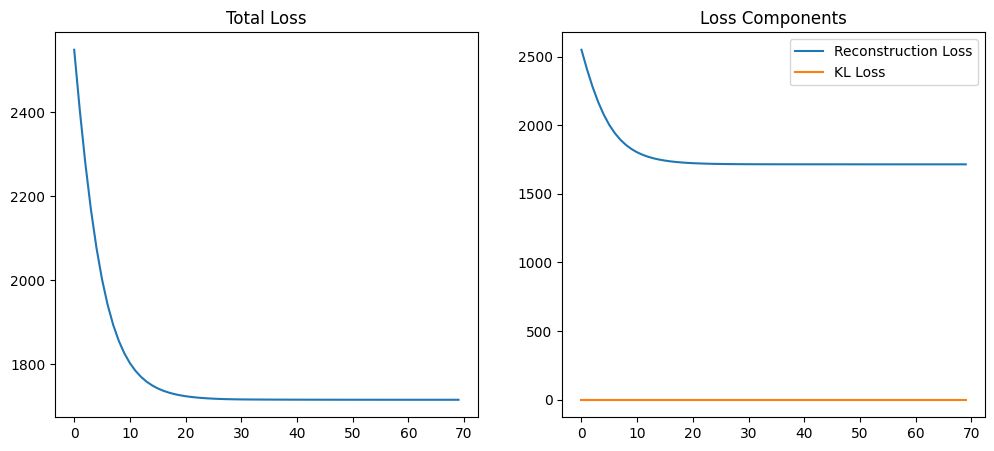

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_stats['total_loss'], label='Total Loss')
plt.title('Total Loss')
plt.subplot(1, 2, 2)
plt.plot(training_stats['recon_loss'], label='Reconstruction Loss')
plt.plot(training_stats['kl_loss'], label='KL Loss')
plt.title('Loss Components')
plt.legend()
plt.show()

# Sample Generation

## Generating Samples with Random Conditions

In [10]:
generated_samples, conditions = trainer.generate_samples(num_samples=5)

print("Shape of generated samples:", generated_samples.shape)
print("Condition vectors:", conditions)

Shape of generated samples: (25, 8, 750)
Condition vectors: [[1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


EnCodec uyumluluk testi yapılıyor...


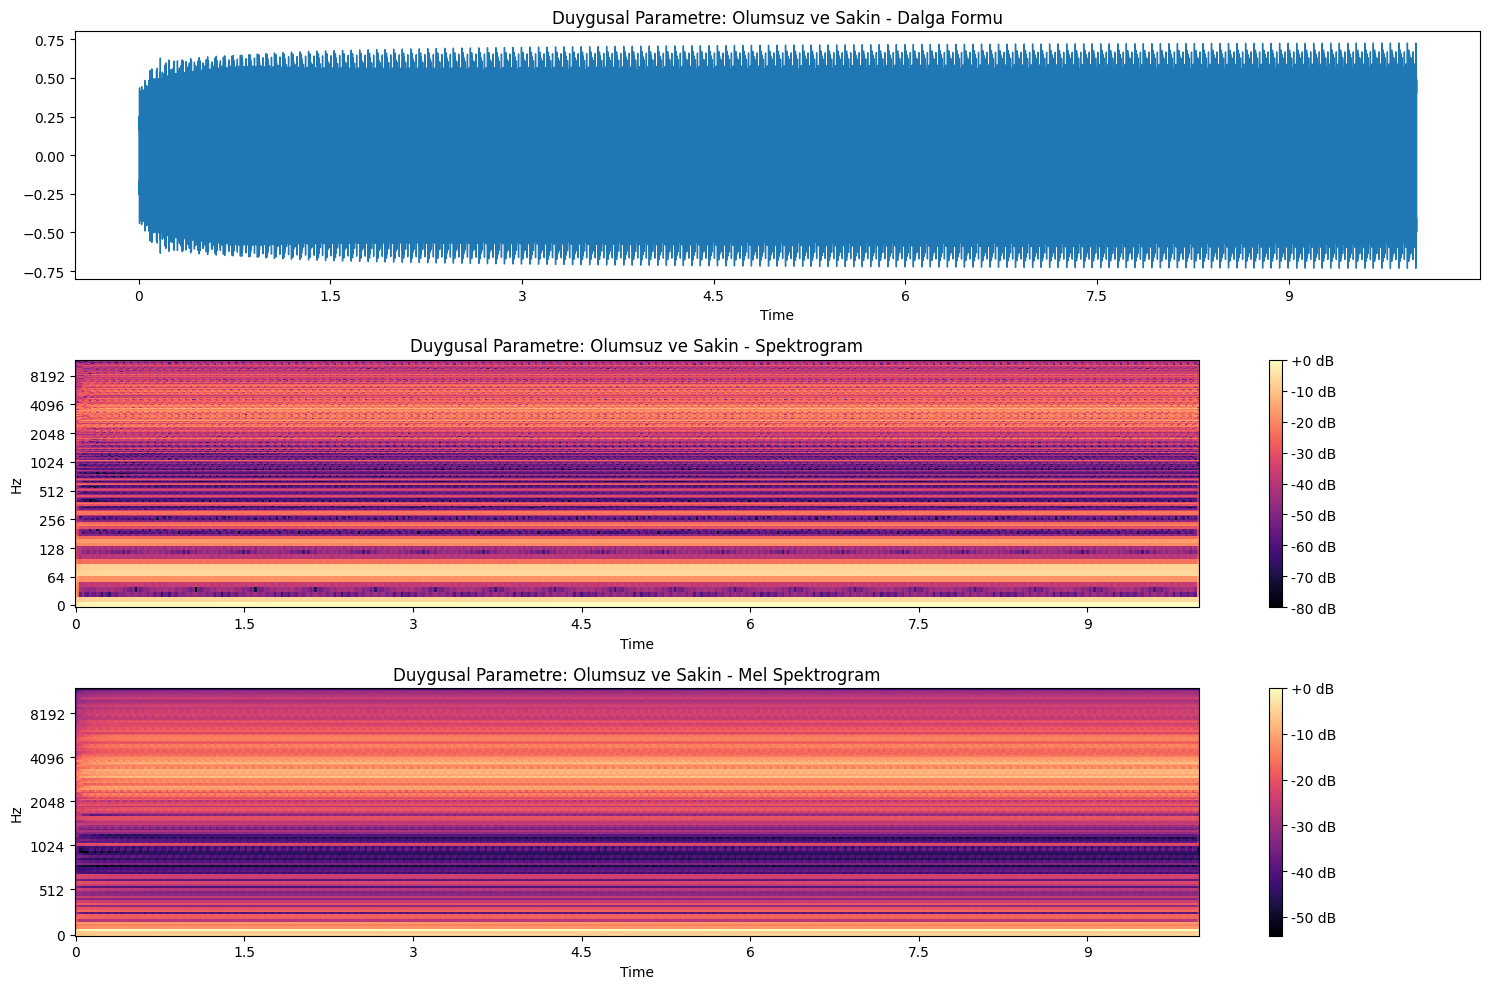

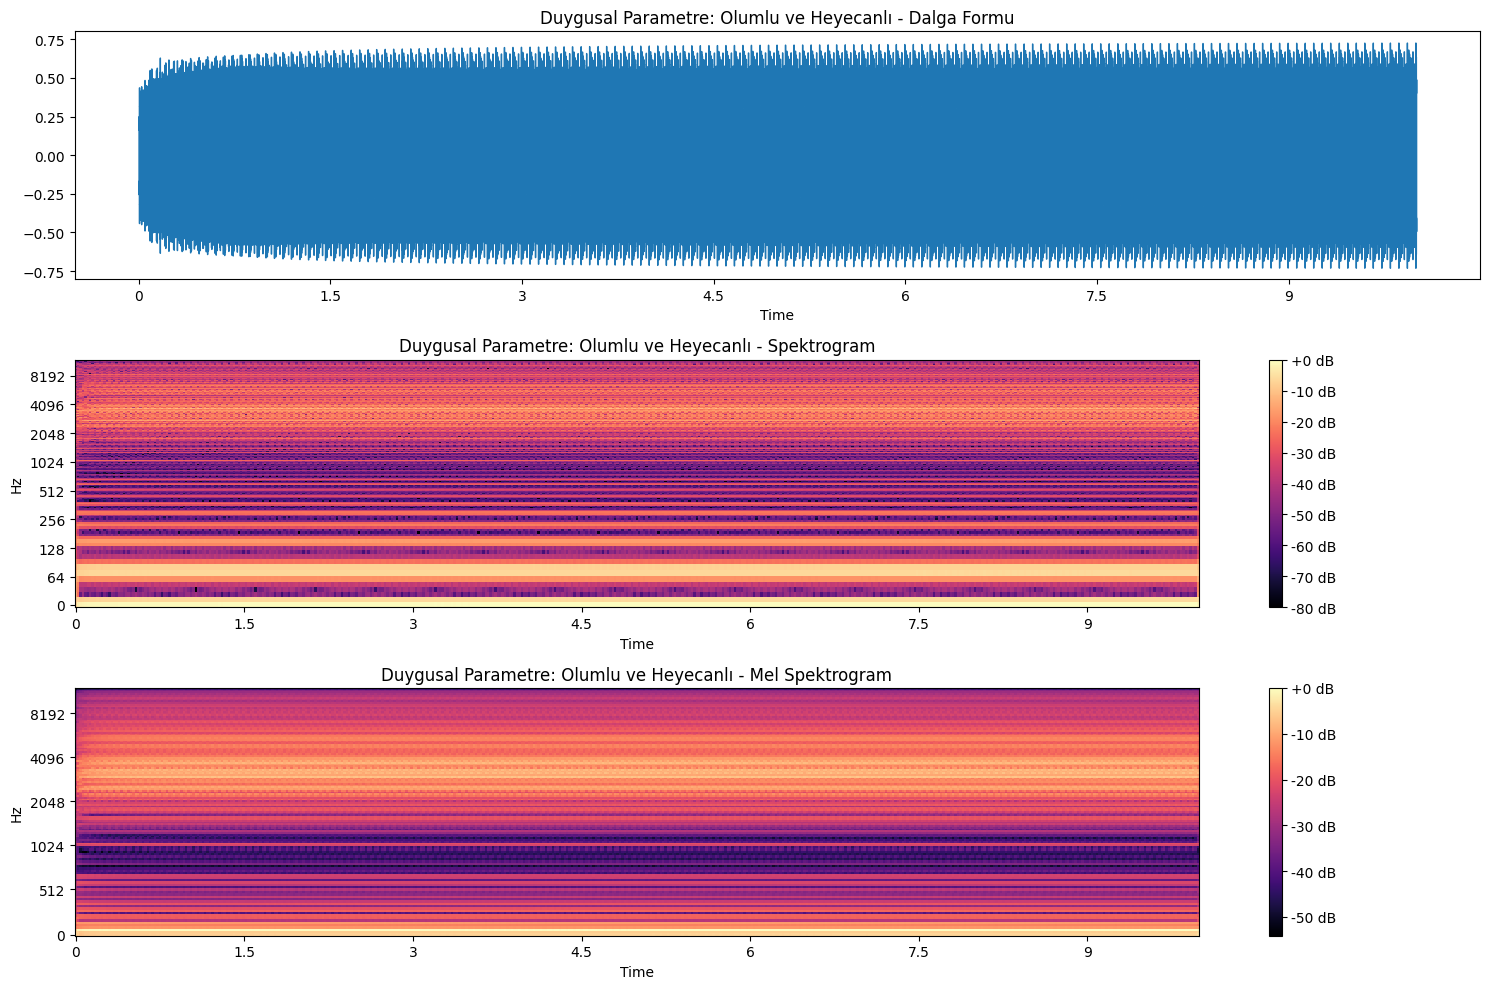

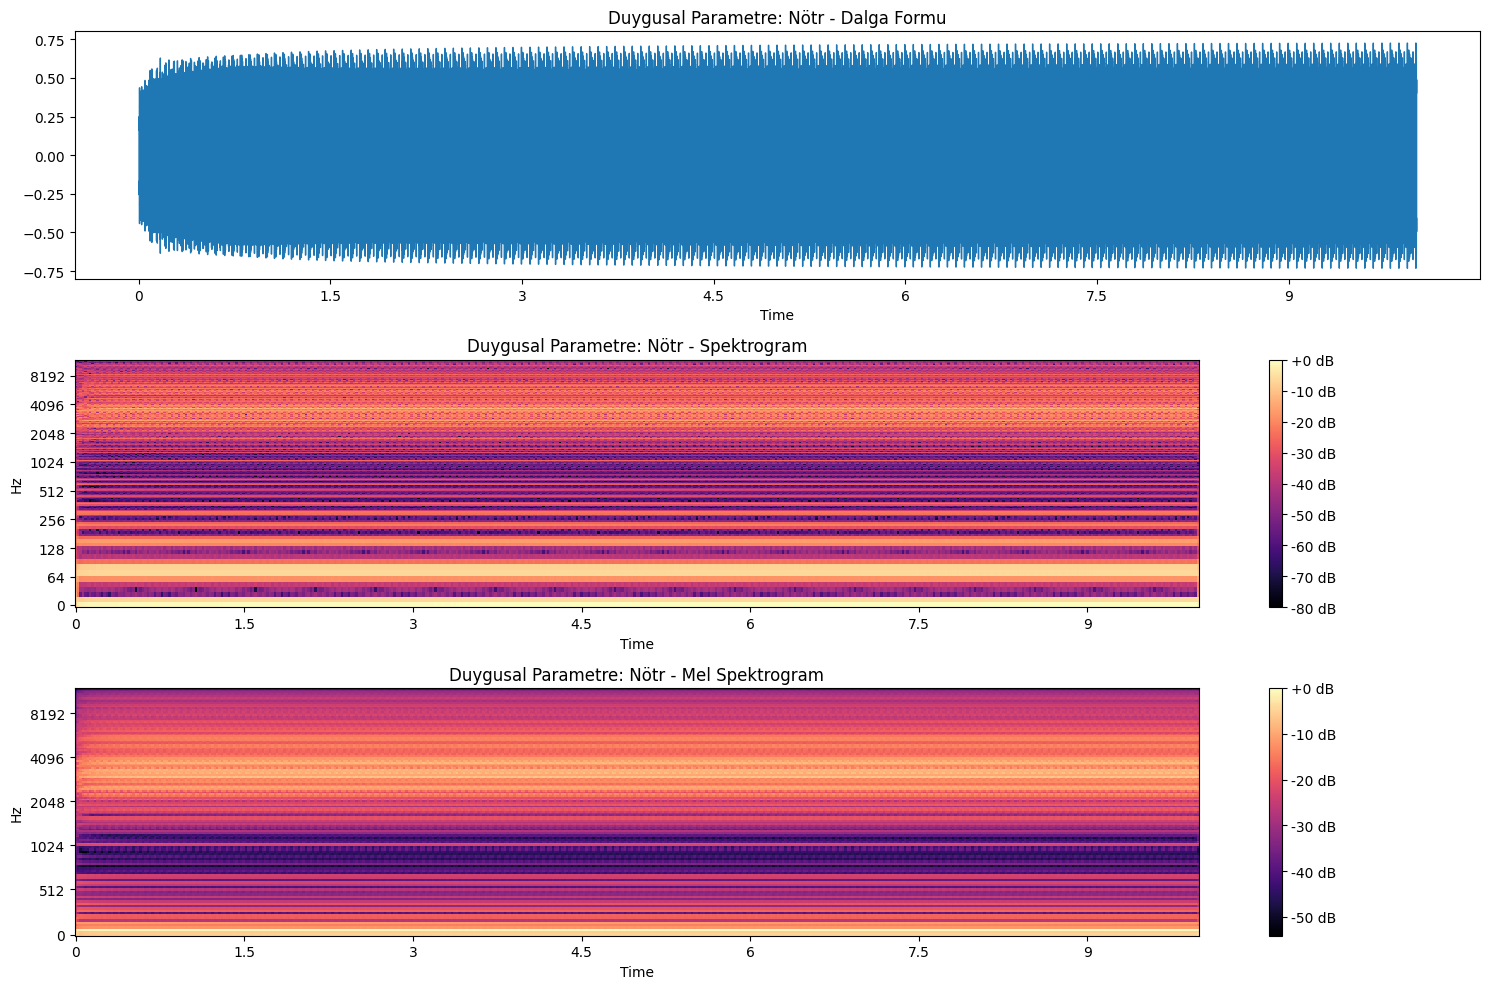

In [11]:
# 4. EnCodec Uyumluluk Testi ve Spektrogram Analizi
import librosa
def analyze_audio(audio, sr, title):
    """Ses örneğini analiz et ve görselleştir"""
    plt.figure(figsize=(15, 10))
    
    # Dalga formu
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"{title} - Dalga Formu")
    
    # Spektrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title} - Spektrogram")
    
    # Mel spektrogram
    plt.subplot(3, 1, 3)
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title} - Mel Spektrogram")
    
    plt.tight_layout()
    plt.show()

# Farklı duygusal parametrelerle EnCodec uyumluluğu test et
print("EnCodec uyumluluk testi yapılıyor...")

test_conditions = [
    (0.2, 0.2, "Olumsuz ve Sakin"),
    (0.8, 0.8, "Olumlu ve Heyecanlı"),
    (0.5, 0.5, "Nötr")
]

for v, a, desc in test_conditions:
    condition = torch.tensor([[v, a]], device=device)
    
    with torch.no_grad():
        # Rastgele z vektörü
        z = torch.randn(1, model.quantizer_count * model.latent_dim, device=device)
        sample = model.decode(z, condition)
        
        # EnCodec decoder ile ses oluştur
        codes_int = sample.long()
        scale = torch.ones(1, 1).to(device)
        decoded_audio = lat_gen.encodec_model.decode([(codes_int, scale)])[0]
        audio_np = decoded_audio.cpu().numpy()[0]
        
        # Analiz
        analyze_audio(audio_np, lat_gen.encodec_model.sample_rate, f"Duygusal Parametre: {desc}")
        
        # Kaydet
        output_path = f"encodec_test_{desc.replace(' ', '_')}.wav"
        sf.write(output_path, audio_np, lat_gen.encodec_model.sample_rate)

Loaded a total of 100 latent representations.


Loading latent representations:   0%|          | 0/100 [00:00<?, ?it/s]

Validation dataset is ready, starting the analysis...
Reconstruction MSE: 173240.9531
Reconstruction MAE: 347.0403


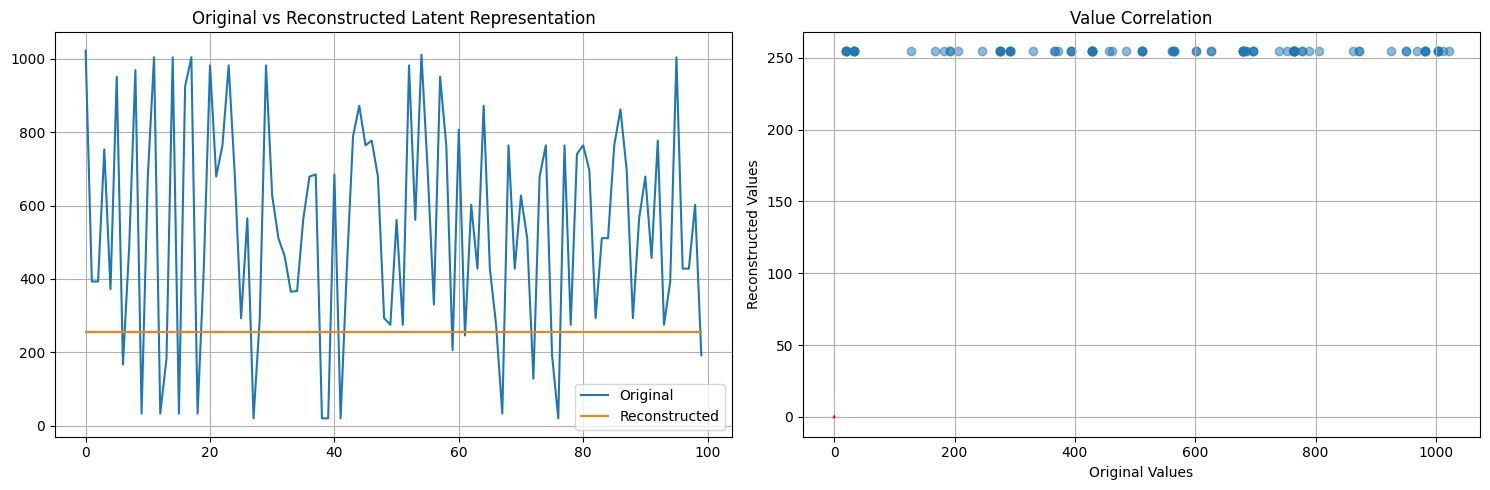

In [13]:
# --- Model Analysis and Advanced Visualizations ---

import numpy as np
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import torch.nn.functional as F

# Preparing validation dataset for analysis
val_dataset = EmotionalLatentDataset(
    latent_dir=config["latent_dir"],
    chunk_size=config["chunk_size"],
    max_samples=100  # Limited samples for analysis
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False
)

print("Validation dataset is ready, starting the analysis...")

# 1. Reconstruction Quality Analysis
model.eval()
all_originals = []
all_reconstructions = []
all_conditions = []

with torch.no_grad():
    for batch in val_loader:
        latents = batch['latent'].to(device)
        conditions = torch.stack([batch['valence'], batch['arousal']], dim=1).to(device)
        recon_batch, mu, logvar = model(latents, conditions)
        
        all_originals.append(latents.cpu())
        all_reconstructions.append(recon_batch.cpu())
        all_conditions.append(conditions.cpu())
        
all_originals = torch.cat(all_originals)
all_reconstructions = torch.cat(all_reconstructions)
all_conditions = torch.cat(all_conditions)

# Calculating MSE and MAE
mse = F.mse_loss(all_reconstructions, all_originals).item()
mae = F.l1_loss(all_reconstructions, all_originals).item()
print(f"Reconstruction MSE: {mse:.4f}")
print(f"Reconstruction MAE: {mae:.4f}")

# Visualizing reconstruction for a single example
plt.figure(figsize=(15, 5))
example_idx = 0  # First example
orig = all_originals[example_idx, 0, :100].numpy()  # First quantizer, first 100 values
recon = all_reconstructions[example_idx, 0, :100].numpy()

plt.subplot(1, 2, 1)
plt.plot(orig, label='Original')
plt.plot(recon, label='Reconstructed')
plt.title('Original vs Reconstructed Latent Representation')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(orig, recon, alpha=0.5)
plt.plot([-1, 1], [-1, 1], 'r--')
plt.xlabel('Original Values')
plt.ylabel('Reconstructed Values')
plt.title('Value Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()


Total Number of Parameters: 9,798,096
Number of Trainable Parameters: 9,798,096


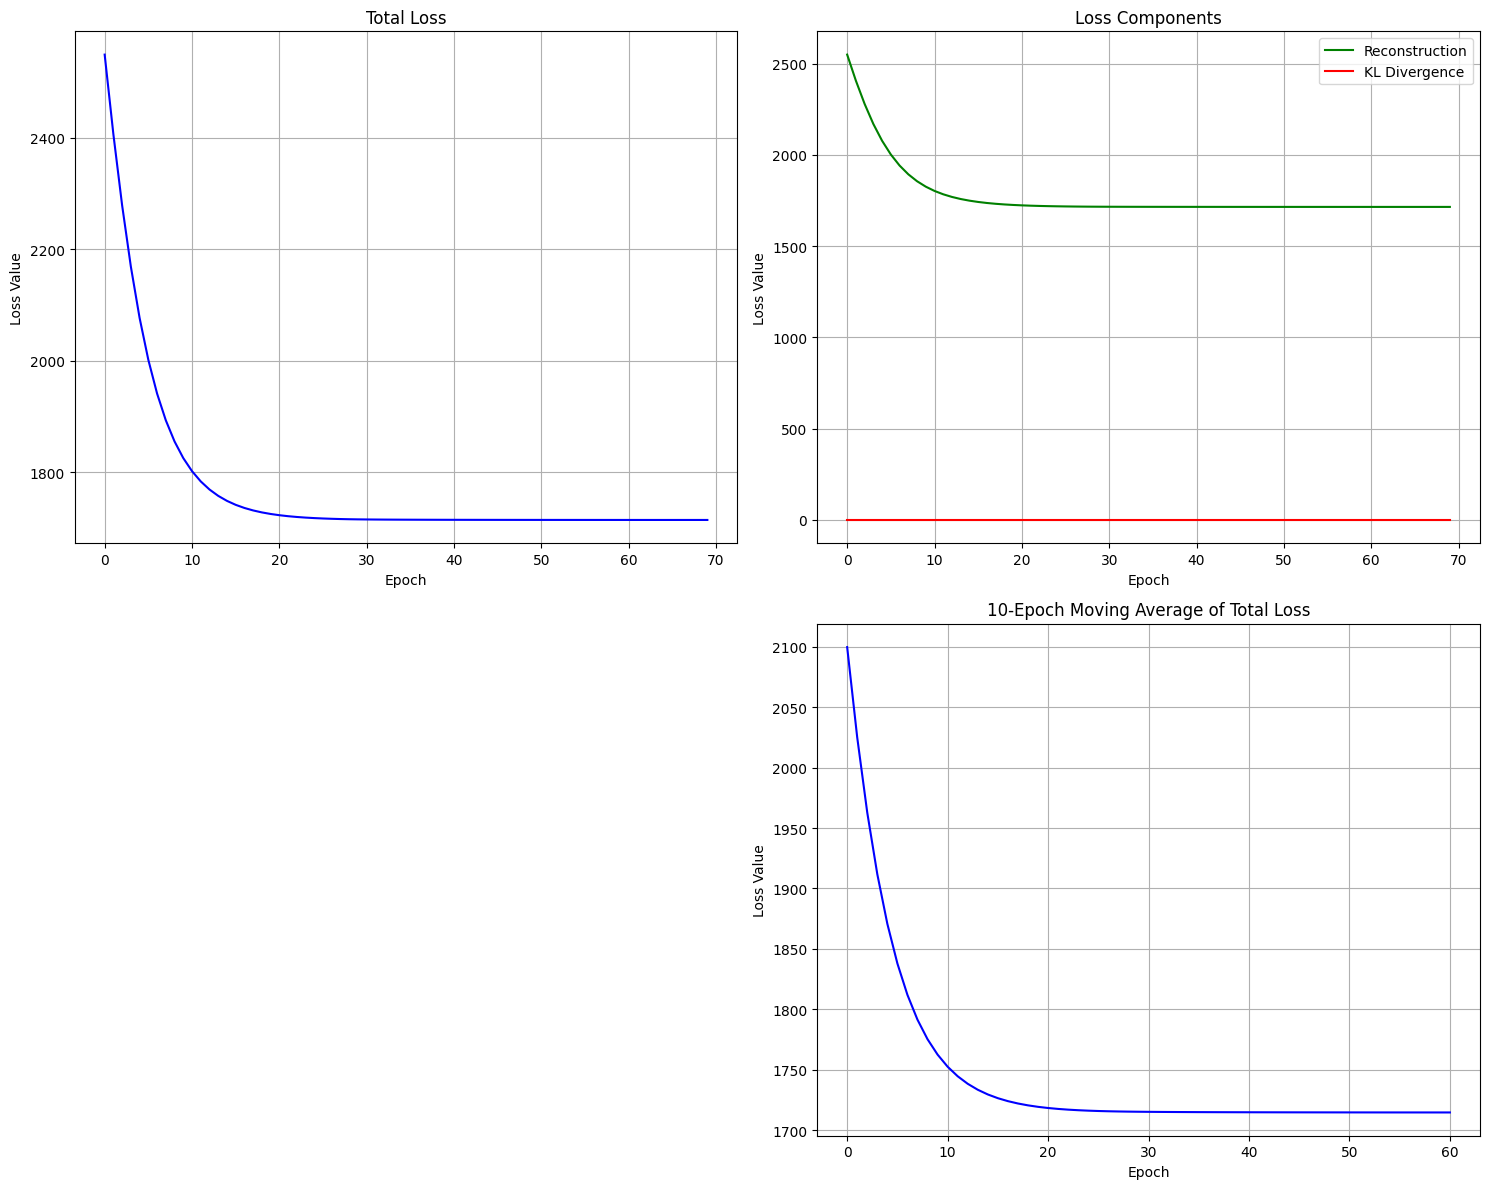


Final Training Metrics:
Final Total Loss: 1714.7103
Final Reconstruction Loss: 1714.7103
Final KL Divergence Loss: 0.0000


In [15]:
# 5. Statistical Analysis of the Model and Other Metrics

def get_model_stats(model):
    """Collect statistics about model parameters"""
    stats = {}
    total_params = 0
    trainable_params = 0
    
    for name, param in model.named_parameters():
        param_count = param.numel()
        total_params += param_count
        if param.requires_grad:
            trainable_params += param_count
        
        # Parameter statistics
        if param.data is not None:
            stats[f"{name}_mean"] = param.data.mean().item()
            stats[f"{name}_std"] = param.data.std().item()
            stats[f"{name}_min"] = param.data.min().item()
            stats[f"{name}_max"] = param.data.max().item()
    
    stats["total_params"] = total_params
    stats["trainable_params"] = trainable_params
    
    return stats

# Display model statistics
model_stats = get_model_stats(model)
print(f"Total Number of Parameters: {model_stats['total_params']:,}")
print(f"Number of Trainable Parameters: {model_stats['trainable_params']:,}")

# Detailed visualization of training statistics
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.plot(training_stats['total_loss'], 'b-')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(training_stats['recon_loss'], 'g-', label='Reconstruction')
plt.plot(training_stats['kl_loss'], 'r-', label='KL Divergence')
plt.title('Loss Components')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)

# If token_range_loss and smoothness_loss are available
if 'token_range_loss' in training_stats and 'smoothness_loss' in training_stats:
    plt.subplot(2, 2, 3)
    plt.plot(training_stats['token_range_loss'], 'm-', label='Token Range Loss')
    plt.plot(training_stats['smoothness_loss'], 'c-', label='Smoothness Loss')
    plt.title('Additional Loss Components')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.grid(True)

# Moving average of total loss
plt.subplot(2, 2, 4)
window_size = min(10, len(training_stats['total_loss']))
moving_avg = np.convolve(training_stats['total_loss'], np.ones(window_size)/window_size, mode='valid')
plt.plot(moving_avg, 'b-')
plt.title(f'{window_size}-Epoch Moving Average of Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.grid(True)

plt.tight_layout()
plt.show()

# Final training statistics
print("\nFinal Training Metrics:")
print(f"Final Total Loss: {training_stats['total_loss'][-1]:.4f}")
print(f"Final Reconstruction Loss: {training_stats['recon_loss'][-1]:.4f}")
print(f"Final KL Divergence Loss: {training_stats['kl_loss'][-1]:.4f}")

if 'token_range_loss' in training_stats and 'smoothness_loss' in training_stats:
    print(f"Final Token Range Loss: {training_stats['token_range_loss'][-1]:.4f}")
    print(f"Final Smoothness Loss: {training_stats['smoothness_loss'][-1]:.4f}")


In [17]:
# 8. Saving the Model and Summary Report

# Save the model
model_save_path = os.path.join(config['output_dir'], 'final_model.pt')
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': trainer.optimizer.state_dict() if hasattr(trainer, 'optimizer') else None,
    'training_stats': training_stats,
    'config': config,
    'compatibility_results': compatibility_results,
}, model_save_path)

print(f"Model saved: {model_save_path}")

# Summary report
print("\n===== EMOTIONAL VAE MODEL SUMMARY REPORT =====")
print(f"Training Epochs: {config['epochs']}")
print(f"Latent Dimension: {latent_dim}")
print(f"Hidden Layer Dimensions: {model.hidden_dims}")
print(f"Total Number of Parameters: {model_stats['total_params']:,}")
print(f"Initial Loss: {training_stats['total_loss'][0]:.4f}")
print(f"Final Loss: {training_stats['total_loss'][-1]:.4f}")
print(f"Improvement Rate: {(1 - training_stats['total_loss'][-1]/training_stats['total_loss'][0])*100:.2f}%")
print(f"Reconstruction MSE: {mse:.4f}")
print(f"EnCodec Compatibility Rate: {compatibility_results['compatibility_rate']*100:.1f}%")
print("=============================================")

# Save training statistics as JSON
stats_save_path = os.path.join(config['output_dir'], 'training_stats.json')
with open(stats_save_path, 'w') as f:
    json.dump({
        'training_stats': {k: [float(v) for v in vals] if isinstance(vals, list) else float(vals) 
                          for k, vals in training_stats.items()},
        'model_stats': {k: float(v) if isinstance(v, (int, float)) else v 
                       for k, v in model_stats.items()},
        'compatibility_results': compatibility_results,
        'config': config
    }, f, indent=2)

print(f"Training statistics saved: {stats_save_path}")


Model saved: vae_model\final_model.pt

===== EMOTIONAL VAE MODEL SUMMARY REPORT =====
Training Epochs: 70
Latent Dimension: 750
Hidden Layer Dimensions: [512, 256, 128]
Total Number of Parameters: 9,798,096
Initial Loss: 2549.0212
Final Loss: 1714.7103
Improvement Rate: 32.73%
Reconstruction MSE: 173240.9531
EnCodec Compatibility Rate: 100.0%
Training statistics saved: vae_model\training_stats.json
